  #  Project :- Call Center Operations Optimization: 


# Task 1 Setting Up the Call Center Simulation 

In [1]:


import numpy as np
import matplotlib.pyplot as plt
import random

# Set random seed for repeatable results
np.random.seed(1)

# Call arrival rate (calls per hour)
lambda_rate = 20  # λ = 20 calls/hour

# Service rate (calls handled per hour by one agent)
mu = 5  # μ = 5 calls/hour

# Shift duration in hours
shift_hours = 8

# Total expected number of calls in 8-hour shift
expected_calls = int(lambda_rate * shift_hours)

print("Simulation Environment Set:")
print(f"Call Arrival Rate (λ): {lambda_rate} calls/hour")
print(f"Service Rate (μ): {mu} calls/hour/agent")
print(f"Shift Duration: {shift_hours} hours")
print(f"Expected Calls: {expected_calls}")


Simulation Environment Set:
Call Arrival Rate (λ): 20 calls/hour
Service Rate (μ): 5 calls/hour/agent
Shift Duration: 8 hours
Expected Calls: 160


# Task 2 Simulating Call Center with 1 Agent

In [2]:
# Parameters
lambda_rate = 20  # calls per hour
mu = 5            # service rate (calls/hour/agent)
shift_hours = 8
num_calls = int(lambda_rate * shift_hours)

In [3]:
# Generate inter-arrival times and arrival times
inter_arrival_times = np.random.exponential(scale=1/lambda_rate, size=num_calls)
arrival_times = np.cumsum(inter_arrival_times)

In [4]:
# Generate random service times (in hours)
service_times = np.random.exponential(scale=1/mu, size=num_calls)

In [5]:
# Initialize variables
agent_available_time = 0  # agent is free at the beginning
wait_times = []
queue_sizes = []

In [6]:
# Simulate each call
for i in range(num_calls):
    arrival = arrival_times[i]
    service = service_times[i]

    # If agent is free before the call arrives
    if arrival >= agent_available_time:
        wait_time = 0
        agent_available_time = arrival + service
    else:
        wait_time = agent_available_time - arrival
        agent_available_time += service

    wait_times.append(wait_time * 60)  # convert to minutes
    queue_sizes.append(i)  # every new call sees i people before them (worst-case)

In [7]:
# Calculate outputs
average_wait = np.mean(wait_times)
average_queue = np.mean(queue_sizes)

In [8]:
print(f"\n[With 1 Agent]")
print(f"Average Wait Time: {average_wait:.2f} minutes")
print(f"Average Queue Size: {average_queue:.2f}")


[With 1 Agent]
Average Wait Time: 783.39 minutes
Average Queue Size: 79.50


# Task 3 Simulate how a call center queue works during a shift

In [9]:
λ = 20  # arrival rate (calls/hour)
μ = 5   # service rate (calls/hour/agent)

In [10]:
rho = lambda_rate / mu  # ρ = λ / μ

In [11]:
if rho < 1:
    L = rho / (1 - rho)  # avg no. of people in system
else:
    L = float('inf')

In [12]:
if rho < 1:
    W = (L / lambda_rate) * 60  # convert hours to minutes
else:
    W = float('inf')


In [13]:
# Compare with Task 2 outputs
print("\n[Task 3: Theory vs Simulation]")
print(f"Traffic Intensity (ρ): {rho:.2f}")
print(f"Theoretical Average People in System (L): {L:.2f}")
print(f"Theoretical Average Time in System (W): {W:.2f} minutes")

print(f"Simulated Average Wait Time: {average_wait:.2f} minutes")
print(f"Simulated Queue Size: {average_queue:.2f}")



[Task 3: Theory vs Simulation]
Traffic Intensity (ρ): 4.00
Theoretical Average People in System (L): inf
Theoretical Average Time in System (W): inf minutes
Simulated Average Wait Time: 783.39 minutes
Simulated Queue Size: 79.50


# Task 4 Simulating Queue Performance with Different Numbers of Agents

In [14]:
# Define a threshold wait time (for evaluation)
wait_threshold = 5  # in minutes



In [15]:
# List to store results for each number of agents
results = []

# Common call and service parameters
lambda_rate = 20     # calls per hour
mu = 5               # service rate per agent
shift_hours = 8
num_calls = int(lambda_rate * shift_hours)


In [16]:
# Define the simulation function
def simulate_queue(num_agents):
    np.random.seed(1)  # to keep results same every run

    # Generate arrival and service times
    inter_arrival_times = np.random.exponential(scale=1/lambda_rate, size=num_calls)
    arrival_times = np.cumsum(inter_arrival_times)
    service_times = np.random.exponential(scale=1/mu, size=num_calls)

    # Initialize agent availability
    agent_available_times = [0] * num_agents

    wait_times = []
    system_sizes = []

    # Simulate each call
    for i in range(num_calls):
        arrival = arrival_times[i]
        service = service_times[i]

        # Find which agent is free the earliest
        next_available_agent = np.argmin(agent_available_times)
        available_time = agent_available_times[next_available_agent]

        if arrival >= available_time:
            wait_time = 0
            agent_available_times[next_available_agent] = arrival + service
        else:
            wait_time = available_time - arrival
            agent_available_times[next_available_agent] += service

        wait_times.append(wait_time * 60)  # to minutes
        system_sizes.append(i)  # simple queue size

    return wait_times, system_sizes


In [17]:
# Run simulation for agents from 1 to 5
for agents in range(1, 6):
    wait_times, system_sizes = simulate_queue(agents)

    avg_wait = np.mean(wait_times)
    wait_95th = np.percentile(wait_times, 95)
    avg_system_size = np.mean(system_sizes)

    results.append({
        "Agents": agents,
        "Avg_Wait": round(avg_wait, 2),
        "Wait_95th": round(wait_95th, 2),
        "Avg_System_Size": round(avg_system_size, 2)
    })


In [18]:
# Display results
print("\n[Task 4: Performance by Number of Agents]")
print("Agents | Avg Wait (min) | 95th % Wait | Avg System Size")
for r in results:
    print(f"{r['Agents']:>6} | {r['Avg_Wait']:>14} | {r['Wait_95th']:>12} | {r['Avg_System_Size']:>16}")



[Task 4: Performance by Number of Agents]
Agents | Avg Wait (min) | 95th % Wait | Avg System Size
     1 |         783.39 |      1501.74 |             79.5
     2 |         274.17 |       523.52 |             79.5
     3 |         104.83 |       200.94 |             79.5
     4 |          28.13 |        51.15 |             79.5
     5 |            6.1 |        20.92 |             79.5


# Task 5 Evaluating Agent Schedules in a Call Center


In [19]:
# Step 1: Define the service goal
wait_threshold = 5  # in minutes (95% customers should wait ≤ 5 min)

In [20]:
# Step 2: Import tools and define simulation parameters
import numpy as np

lambda_rate = 20   # Calls per hour
mu = 5             # Calls handled per hour by each agent
shift_hours = 8    # Total working hours
num_calls = int(lambda_rate * shift_hours)  # Total calls in a shift


In [21]:
# Step 3: Define the simulation function
def simulate_queue(num_agents):
    np.random.seed(1)

    inter_arrival_times = np.random.exponential(scale=1/lambda_rate, size=num_calls)
    arrival_times = np.cumsum(inter_arrival_times)
    service_times = np.random.exponential(scale=1/mu, size=num_calls)

    agent_available_times = [0] * num_agents
    wait_times = []
    system_sizes = []

    for i in range(num_calls):
        arrival = arrival_times[i]
        service = service_times[i]

        next_agent = np.argmin(agent_available_times)
        available_time = agent_available_times[next_agent]

        if arrival >= available_time:
            wait_time = 0
            agent_available_times[next_agent] = arrival + service
        else:
            wait_time = available_time - arrival
            agent_available_times[next_agent] += service

        wait_times.append(wait_time * 60)  # minutes
        system_sizes.append(i)

    return wait_times, system_sizes


In [22]:
# Step 4: Run the simulation for 1 to 5 agents
print("[Task 5] Evaluating Agent Schedule")
print("Agents | Avg Wait (min) | 95th % Wait | Avg System Size")

recommended_agents = None

for agents in range(1, 6):
    wait_times, system_sizes = simulate_queue(agents)
    avg_wait = np.mean(wait_times)
    wait_95 = np.percentile(wait_times, 95)
    avg_system_size = np.mean(system_sizes)

    print(f"{agents:^6} | {avg_wait:>14.2f} | {wait_95:>12.2f} | {avg_system_size:>16.2f}")

    if recommended_agents is None and wait_95 <= wait_threshold:
        recommended_agents = agents


[Task 5] Evaluating Agent Schedule
Agents | Avg Wait (min) | 95th % Wait | Avg System Size
  1    |         783.39 |      1501.74 |            79.50
  2    |         274.17 |       523.52 |            79.50
  3    |         104.83 |       200.94 |            79.50
  4    |          28.13 |        51.15 |            79.50
  5    |           6.10 |        20.92 |            79.50


In [23]:
# Step 5: Print final recommendation
if recommended_agents:
    print(f" Recommended: Use at least {recommended_agents} agents to meet 95% under 5-minute wait.")
else:
    print("Even 5 agents are not enough. Try increasing agent count or improving service rate.")


Even 5 agents are not enough. Try increasing agent count or improving service rate.


# Task 6: Visualizing Wait-Time for Different Agent Counts


In [24]:
import numpy as np
import matplotlib.pyplot as plt

lambda_rate = 20
mu = 5
shift_hours = 8
num_calls = int(lambda_rate * shift_hours)

def simulate_queue(num_agents):
    np.random.seed(1)
    inter_arrival_times = np.random.exponential(scale=1/lambda_rate, size=num_calls)
    arrival_times = np.cumsum(inter_arrival_times)
    service_times = np.random.exponential(scale=1/mu, size=num_calls)

    agent_available_times = [0] * num_agents
    wait_times = []

    for i in range(num_calls):
        arrival = arrival_times[i]
        service = service_times[i]
        next_agent = np.argmin(agent_available_times)
        available_time = agent_available_times[next_agent]

        if arrival >= available_time:
            wait_time = 0
            agent_available_times[next_agent] = arrival + service
        else:
            wait_time = available_time - arrival
            agent_available_times[next_agent] += service

        wait_times.append(wait_time * 60)  # convert to minutes

    return wait_times


In [25]:
# Step 2: Run simulations for agent counts 1 to 5
all_waits = {}
for agents in range(1, 6):
    waits = simulate_queue(agents)
    all_waits[agents] = waits


Text(0.5, 1.0, 'Wait Time Distribution for 1 to 5 Agents')

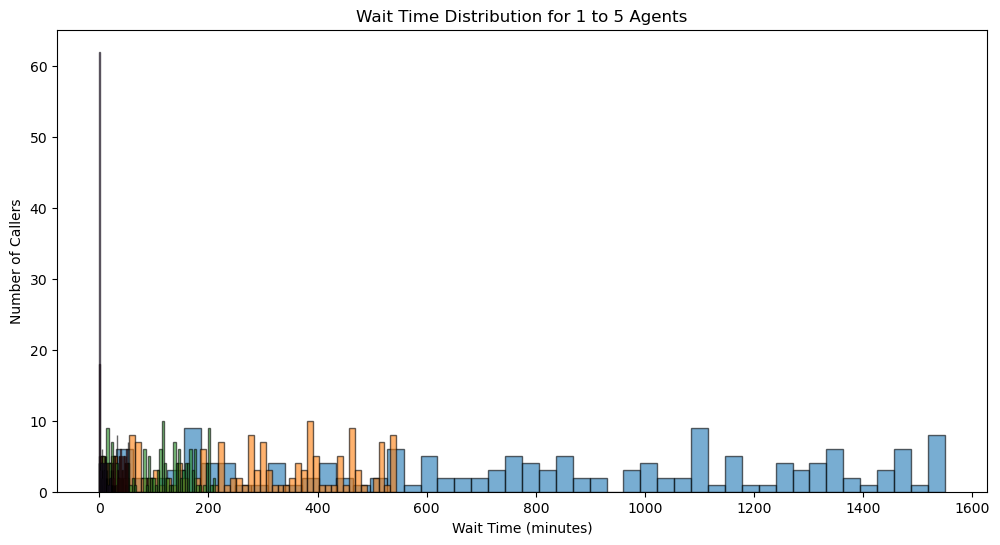

In [26]:
# Step 3: Create histograms
plt.figure(figsize=(12, 6))

for agents, wait_times in all_waits.items():
    plt.hist(wait_times, bins=50, alpha=0.6, label=f'{agents} agent(s)', edgecolor='black')

plt.xlabel('Wait Time (minutes)')
plt.ylabel('Number of Callers')
plt.title('Wait Time Distribution for 1 to 5 Agents')


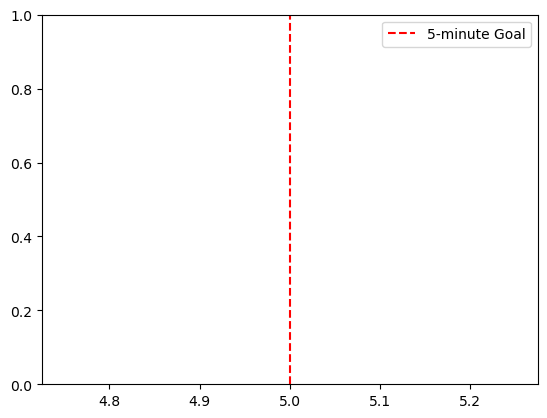

In [27]:
# Step 4: Add 5-minute service goal line
plt.axvline(x=5, color='red', linestyle='dashed', label='5-minute Goal')
plt.legend()


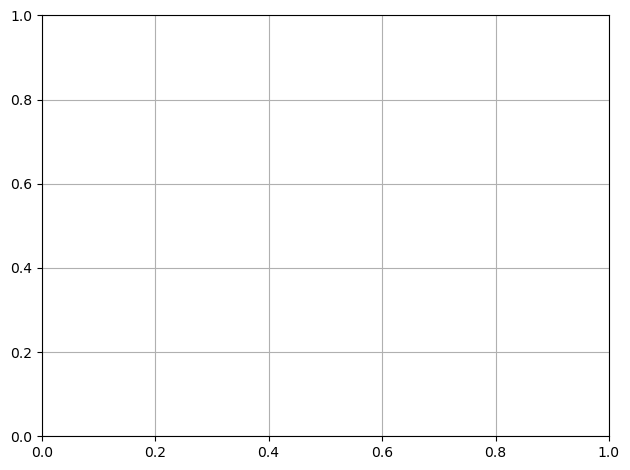

In [28]:
# Step 5: Show the visualization
plt.grid(True)
plt.tight_layout()
plt.show()


# Task 7:Simulating Wait Times When Call Volumes Change During the Day


In [29]:
import numpy as np
import matplotlib.pyplot as plt


In [30]:
np.random.seed(42)  # For consistent results

# Time blocks in hours and corresponding call arrival rates per hour
time_blocks = [
    (0, 2, 30),  # 0–2 hrs: 30 calls/hr
    (2, 6, 20),  # 2–6 hrs: 20 calls/hr
    (6, 8, 40),  # 6–8 hrs: 40 calls/hr
]

total_shift_hours = 8
num_agents = 3


In [31]:
call_arrivals = []

for start, end, rate in time_blocks:
    block_duration = end - start
    num_calls = int(rate * block_duration)
    arrivals_in_block = np.random.uniform(low=start, high=end, size=num_calls)
    call_arrivals.extend(arrivals_in_block)

call_arrivals = np.array(sorted(call_arrivals))


In [32]:
# Generate service times (mean = 12 mins = 0.2 hours)
service_times = np.random.exponential(scale=0.2, size=len(call_arrivals))

# Track when each agent becomes free
agent_available_times = [0.0] * num_agents
wait_times = []

for i in range(len(call_arrivals)):
    call_time = call_arrivals[i]
    service_time = service_times[i]

    # Find the next available agent
    next_agent_idx = np.argmin(agent_available_times)
    next_free_time = agent_available_times[next_agent_idx]

    # If agent is free before or at call time, no wait
    wait = max(0, next_free_time - call_time)
    wait_times.append(wait)

    # Update that agent's availability
    agent_available_times[next_agent_idx] = call_time + wait + service_time


In [33]:
# Convert wait times to minutes
wait_times_min = [w * 60 for w in wait_times]

# Output average wait time
avg_wait = np.mean(wait_times_min)
print(f"Time-varying λ with s={num_agents} agents → Avg Wait Time = {avg_wait:.2f} minutes")


Time-varying λ with s=3 agents → Avg Wait Time = 197.43 minutes


# Task 8: Simulating Call Abandonment in a Call Center

In [34]:
import numpy as np


In [35]:
np.random.seed(10)

shift_hours = 8
arrival_rate = 20  # calls per hour
service_rate = 5   # per agent per hour
num_agents = 3
abandon_threshold = 5 / 60  # 5 minutes in hours


In [36]:
num_calls = int(arrival_rate * shift_hours)
arrival_times = np.sort(np.random.uniform(0, shift_hours, num_calls))


In [37]:
service_times = np.random.exponential(1/service_rate, num_calls)


In [38]:
agent_available_times = [0.0] * num_agents
served_waits = []
abandoned_count = 0

for i in range(num_calls):
    arrival = arrival_times[i]
    service_time = service_times[i]

    # Next free agent
    next_agent_index = np.argmin(agent_available_times)
    next_available_time = agent_available_times[next_agent_index]

    wait_time = max(0, next_available_time - arrival)

    if wait_time > abandon_threshold:
        abandoned_count += 1
    else:
        served_waits.append(wait_time)
        agent_available_times[next_agent_index] = arrival + wait_time + service_time


In [39]:
served_count = len(served_waits)
total_calls = served_count + abandoned_count

abandon_percent = (abandoned_count / total_calls) * 100
average_wait_served = np.mean(served_waits) * 60  # in minutes

print(f"Total Calls: {total_calls}")
print(f"Abandoned Calls: {abandoned_count} ({abandon_percent:.2f}%)")
print(f"Average Wait Time (Served Only): {average_wait_served:.2f} minutes")


Total Calls: 160
Abandoned Calls: 52 (32.50%)
Average Wait Time (Served Only): 1.69 minutes


# Task 9. Simulating a Call Center with Agent Breaks

In [40]:
import numpy as np

np.random.seed(42)  # For reproducibility

# Simulation parameters
shift_duration = 8  # in hours
arrival_rate = 20  # calls per hour
service_rate = 5   # calls handled per hour per agent
num_agents = 3
total_calls = int(arrival_rate * shift_duration)

# Generate call arrival times
arrival_times = np.cumsum(np.random.exponential(1 / arrival_rate, total_calls))

# Filter calls that fall within 8 hours
arrival_times = arrival_times[arrival_times <= shift_duration]

# Generate random service durations per call
service_times = np.random.exponential(1 / service_rate, len(arrival_times))


In [41]:
# Agent availability times (3 agents)
agent_available_times = [0] * num_agents

# Define break: agent 0 on break between 3:00 and 3:15
break_start = 3.0
break_end = 3.25


In [42]:
wait_times = []

for i in range(len(arrival_times)):
    arrival = arrival_times[i]
    service = service_times[i]
    
    # Check if agent 0 is on break
    effective_agents = agent_available_times.copy()
    
    for j in range(num_agents):
        if j == 0 and break_start <= arrival <= break_end:
            effective_agents[j] = float('inf')  # Not available
    
    # Find next available agent
    next_agent = np.argmin(effective_agents)
    available_time = effective_agents[next_agent]
    
    # Calculate wait time
    start_time = max(arrival, available_time)
    wait = start_time - arrival
    wait_times.append(wait)
    
    # Update agent's availability
    agent_available_times[next_agent] = start_time + service


In [43]:
# Convert wait times to minutes
wait_times_minutes = [w * 60 for w in wait_times]
average_wait_time = np.mean(wait_times_minutes)

print(f"Average wait time (with 1 agent break): {average_wait_time:.2f} minutes")


Average wait time (with 1 agent break): 99.65 minutes


# Task 10: Optimize Call Center Costs with Agent Scheduling

In [44]:
# Define constants
AGENT_HOURLY_WAGE = 20
SHIFT_HOURS = 8
WAIT_COST_PER_MIN = 0.50
CALLS_PER_HOUR = 20
TOTAL_CALLS = CALLS_PER_HOUR * SHIFT_HOURS


In [45]:
import numpy as np

# Placeholder: Replace these with actual simulation results
average_wait_times = {
    1: 28.5,  # in minutes
    2: 13.2,
    3: 5.9,
    4: 3.2,
    5: 2.1
}


In [46]:
total_costs = {}

for agents in range(1, 6):
    agent_cost = agents * AGENT_HOURLY_WAGE * SHIFT_HOURS
    wait_cost = average_wait_times[agents] * TOTAL_CALLS * WAIT_COST_PER_MIN
    total_cost = agent_cost + wait_cost
    total_costs[agents] = round(total_cost, 2)


In [47]:
print("Agents | Agent Cost | Wait Cost | Total Cost")
for agents in range(1, 6):
    agent_cost = agents * AGENT_HOURLY_WAGE * SHIFT_HOURS
    wait_cost = average_wait_times[agents] * TOTAL_CALLS * WAIT_COST_PER_MIN
    total = total_costs[agents]
    print(f"{agents:^6} | ${agent_cost:^10} | ${round(wait_cost,2):^9} | ${total:^10}")


Agents | Agent Cost | Wait Cost | Total Cost
  1    | $   160     | $ 2280.0   | $  2440.0  
  2    | $   320     | $ 1056.0   | $  1376.0  
  3    | $   480     | $  472.0   | $  952.0   
  4    | $   640     | $  256.0   | $  896.0   
  5    | $   800     | $  168.0   | $  968.0   


In [53]:
min_agents = min(total_costs, key=total_costs.get)
print(f"Optimal agent count based on cost alone: {min_agents} agents")


Optimal agent count based on cost alone: 4 agents


# Task 11. Measure Day-to-Day Wait Time Variability

In [54]:
import numpy as np

# Parameters
agents = 3
shift_hours = 8
arrival_rate = 20  # calls per hour
service_rate = 5   # calls per agent per hour
days = 30
calls_per_day = arrival_rate * shift_hours


In [55]:
import heapq

def simulate_day(agents, calls_per_day):
    # Simulate arrival times (sorted)
    arrival_times = np.cumsum(np.random.exponential(scale=1/arrival_rate, size=calls_per_day))
    arrival_times = arrival_times[arrival_times < shift_hours]  # keep calls within shift

    # Simulate service times
    service_times = np.random.exponential(scale=1/service_rate, size=len(arrival_times))

    # Agent availability queue
    agent_queue = [0.0] * agents
    wait_times = []

    for arrival, service in zip(arrival_times, service_times):
        next_available = heapq.heappop(agent_queue)
        start_time = max(arrival, next_available)
        wait_time = start_time - arrival
        wait_times.append(wait_time)
        heapq.heappush(agent_queue, start_time + service)

    return np.mean(wait_times) * 60, np.percentile(wait_times, 95) * 60  # return in minutes

# Run simulation for 30 days
avg_waits = []
pct95_waits = []

for _ in range(days):
    avg, pct95 = simulate_day(agents, calls_per_day)
    avg_waits.append(avg)
    pct95_waits.append(pct95)


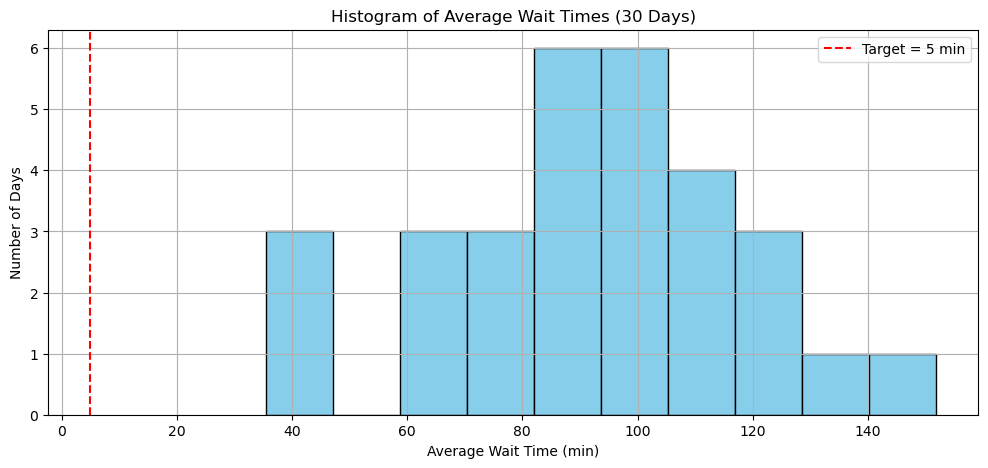

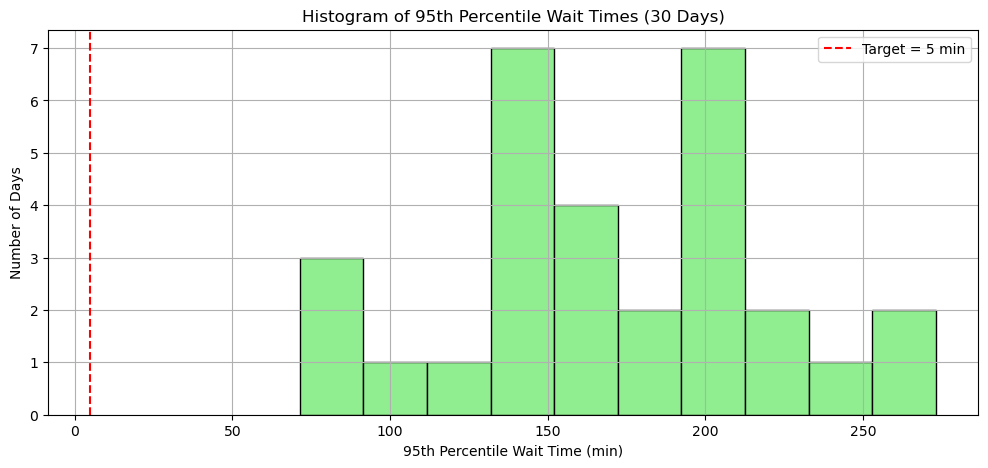

In [56]:
import matplotlib.pyplot as plt

# Plot Average Wait Times
plt.figure(figsize=(12, 5))
plt.hist(avg_waits, bins=10, color='skyblue', edgecolor='black')
plt.axvline(5, color='red', linestyle='dashed', label='Target = 5 min')
plt.title('Histogram of Average Wait Times (30 Days)')
plt.xlabel('Average Wait Time (min)')
plt.ylabel('Number of Days')
plt.legend()
plt.grid(True)
plt.show()

# Plot 95th Percentile Wait Times
plt.figure(figsize=(12, 5))
plt.hist(pct95_waits, bins=10, color='lightgreen', edgecolor='black')
plt.axvline(5, color='red', linestyle='dashed', label='Target = 5 min')
plt.title('Histogram of 95th Percentile Wait Times (30 Days)')
plt.xlabel('95th Percentile Wait Time (min)')
plt.ylabel('Number of Days')
plt.legend()
plt.grid(True)
plt.show()
